In [38]:
from __future__ import print_function

import numpy as np
import pandas as pd

from sklearn.preprocessing import normalize
import sklearn.cluster as skc

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
RANGE = 10
COLORS = [
    'blue',
    'green',
    'cyan',
    'magenta',
    'yellow',
    'purple',
    'orange',
    'lime',
    'pink',
    'yellowgreen',
    'brown',
    'coral',
    'indigo',
    'ivory',
    'khaki',
    'lavender',
    'lightblue',
    'lightgreen',
    'maroon',
    'orchid',
    'tan',
    'aqua',
    'black'
]

In [3]:
queries = np.random.rand(1, 2)

In [4]:
n_past_queries = 2

past_queries = np.random.rand(n_past_queries, 4)
past_queries[:, 2] = np.random.randint(0, 50, size=n_past_queries)
past_queries[:, 3] = np.random.randint(0, 5, size=n_past_queries)

past_queries = pd.DataFrame(past_queries, columns=("Confidence", "GCS Arrival Time", "User Id", "Mission Id"))

In [189]:
past_queries = np.array([[0.5, 15],[0.8, 32]], np.float64)

In [190]:
print("Past Queries")
print(past_queries)

Past Queries
[[  0.5  15. ]
 [  0.8  32. ]]


In [191]:
new_queries = np.array([[0.6, 16], [0.9, 33]], dtype=np.float64)

In [192]:
print("New Queries")
print(new_queries)

New Queries
[[  0.6  16. ]
 [  0.9  33. ]]


In [57]:
normalized_past_queries = normalize(past_queries)
normalized_new_queries = normalize(new_queries)

model = skc.DBSCAN(eps=0.011, min_samples=4).fit(normalized_past_queries)

labels = model.labels_

In [58]:
print("Cluster Labels")
print(labels)

Cluster Labels
[-1 -1]


[]

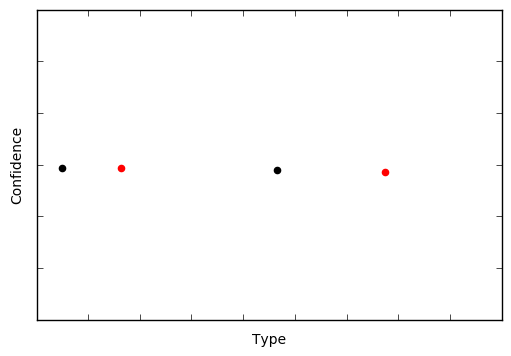

In [59]:
fig,ax = plt.subplots(1)

# ONLY FOR 2D GRAPH
for i in xrange(normalized_past_queries.shape[0]):
    ax.scatter(normalized_past_queries[:, 0][i], normalized_past_queries[:, 1][i], color=COLORS[labels[i]])
    
# Plot the new query.
ax.scatter(normalized_new_queries[:, 0], normalized_new_queries[:, 1], color="Red")

plt.xlabel('Type')
plt.ylabel('Confidence')

# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

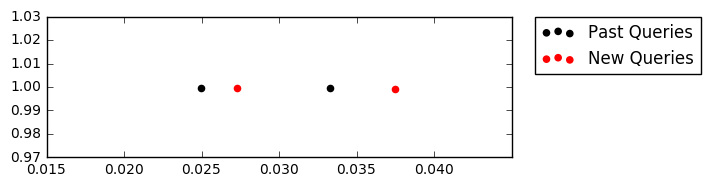

In [69]:
plt.subplot(211)

plt.scatter(normalized_past_queries[:, 0], normalized_past_queries[:, 1], color="Black", label="Past Queries")  

# Plot the new query.
plt.scatter(normalized_new_queries[:, 0], normalized_new_queries[:, 1], color="Red", label="New Queries")
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)


# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [214]:
new_queries

array([[  0.6,  16. ],
       [  0.9,  33. ]])

In [213]:
past_queries

array([[  0.5,  15. ],
       [  0.8,  32. ]])

In [209]:
M = np.dot(new_queries, past_queries.T)
te = np.square(new_queries).sum(axis=1)
tr = np.square(past_queries).sum(axis=1)
dists = np.sqrt(-2*M + np.matrix(tr) + np.matrix(te).T)
print(dists)

[[  1.00498756  16.00124995]
 [ 18.0044439    1.00498756]]


In [210]:
np.argmin(dists, axis=0)

matrix([[0, 1]], dtype=int64)

In [212]:
past_queries

array([[  0.5,  15. ],
       [  0.8,  32. ]])

In [215]:
labels

array([-1, -1], dtype=int64)

In [78]:
normalized_past_queries

array([[ 0.03331483,  0.99944491],
       [ 0.02499219,  0.99968765]])

In [79]:
normalized_new_queries

array([[ 0.03747366,  0.99929762],
       [ 0.02726259,  0.99962831]])

In [174]:
from scipy.spatial import distance

In [101]:
distances = distance.cdist(normalized_past_queries, normalized_new_queries, 'euclidean')

In [102]:
distances

array([[ 0.00416144,  0.00605502],
       [ 0.01248756,  0.00227117]])

In [136]:
for new_query in normalized_new_queries:
    print(new_query)
    for past_query in normalized_past_queries:
        print(past_query)
        print(np.linalg.norm(new_query - past_query))

[ 0.03747366  0.99929762]
[ 0.03331483  0.99944491]
0.00416143781066
[ 0.02499219  0.99968765]
0.0124875619338
[ 0.02726259  0.99962831]
[ 0.03331483  0.99944491]
0.00605501817276
[ 0.02499219  0.99968765]
0.00227117434854


In [137]:
abs((0.03747366 + 0.99929762) - (0.03331483 + 0.99944491))

0.004011540000000036

In [135]:
abs((0.03747366 + 0.99929762) - (0.8 + 32.))

31.763228719999997

In [127]:
print(np.linalg.norm(normalized_new_queries - normalized_past_queries, axis=0))

[ 0.0047382  0.0001588]


In [193]:
new_queries

array([[  0.6,  16. ],
       [  0.9,  33. ]])

In [194]:
past_queries

array([[  0.5,  15. ],
       [  0.8,  32. ]])

In [195]:
num_test = new_queries.shape[0]
num_train = past_queries.shape[0]
dists = np.zeros((num_test, num_train))
for i in xrange(num_test):
    for j in xrange(num_train):
        #####################################################################
        # Compute the l2 distance between the ith test point and the jth    #
        # training point, and store the result in dists[i, j]               #
        #####################################################################
        dists[i,j] = np.sqrt(np.sum(np.square(new_queries[i,:]-past_queries[j,:])))

In [196]:
np.sqrt(1.1)

1.0488088481701516

In [197]:
dists

array([[  1.00498756,  16.00124995],
       [ 18.0044439 ,   1.00498756]])

In [199]:
dists

matrix([[  1.00498756,  16.00124995],
        [ 18.0044439 ,   1.00498756]])

In [200]:
M = np.dot(new_queries, past_queries.T)
te = np.square(new_queries).sum(axis=1)
tr = np.square(past_queries).sum(axis=1)
dists = np.sqrt(-2*M + np.matrix(tr) + np.matrix(te).T)

In [180]:
dists = np.zeros((new_queries.shape[0], past_queries.shape[1]))

dists[i,:] = np.sqrt(np.sum(np.square(new_queries[i,:] - past_queries), axis=1))

In [181]:
dists

array([[  0.        ,   0.        ],
       [ 18.0044439 ,   1.00498756]])

In [175]:
distances

for new_query in new_queries:
    print(new_query)
    distance.cdist(past_queries, new_query, 'euclidean')
    d = distance(new_query - past_queries, axis=0)
    print(d)
    print(d.sum(axis=0))
    print()

[  0.6  16. ]


ValueError: XB must be a 2-dimensional array.

In [21]:
query

array([ 0.94489323,  0.931707  ])

In [19]:
normalized_queries - query 

array([[-0.9066548 ,  0.06756165],
       [-0.65836678,  0.02636533]])

In [12]:
for query in queries:
    print(query)
    dist = np.linalg.norm()

[ 0.94489323  0.931707  ]


ValueError: Wrong number of items passed 2, placement implies 4

In [81]:
queries.shape

(1L, 2L)

TypeError: norm() takes at least 1 argument (0 given)

In [76]:
queries

array([[ 0.09522578,  0.3722102 ],
       [ 0.85839548,  0.05964212],
       [ 0.05069258,  0.30599416],
       [ 0.30073792,  0.26384037],
       [ 0.98686336,  0.58228599]])

In [71]:
normalized_queries

array([[ 0.76761036,  0.64091679],
       [ 0.15033378,  0.9886353 ],
       [ 0.58591577,  0.81037196],
       [ 0.9822588 ,  0.18753039],
       [ 0.61825599,  0.7859768 ],
       [ 0.86233108,  0.50634486],
       [ 0.77003937,  0.63799637],
       [ 0.40685831,  0.91349128],
       [ 0.66343197,  0.74823661],
       [ 0.92395398,  0.38250364],
       [ 0.84991578,  0.52691856],
       [ 0.46640421,  0.88457171],
       [ 0.51781954,  0.85548988],
       [ 0.76788157,  0.64059183],
       [ 0.96621986,  0.2577192 ],
       [ 0.99648987,  0.08371343],
       [ 0.99199796,  0.12625393],
       [ 0.26876561,  0.96320561],
       [ 0.47516757,  0.87989532],
       [ 0.71351295,  0.70064204],
       [ 0.42809113,  0.90373557],
       [ 0.33139521,  0.94349203],
       [ 0.98171434,  0.19036008],
       [ 0.99999864,  0.00165072],
       [ 0.6938168 ,  0.72015154],
       [ 0.67553249,  0.73733022],
       [ 0.42542854,  0.90499202],
       [ 0.82497536,  0.5651687 ],
       [ 0.99307187,

In [69]:
model.labels_

array([ 0, -1, -1, -1, -1,  1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  2, -1, -1, -1, -1, -1,  2,  3, -1,  3, -1, -1, -1, -1,
        1, -1, -1,  2,  3,  4, -1, -1,  3, -1, -1, -1,  0, -1, -1, -1,  4,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  1,
       -1, -1, -1, -1,  5,  5, -1, -1, -1, -1,  5, -1, -1,  4, -1, -1, -1,
        2, -1, -1, -1, -1,  1, -1, -1, -1,  4, -1, -1, -1,  2, -1], dtype=int64)

array([[  2.16414750e-01,   1.83090668e-01,   3.50000000e+01,
          2.00000000e+00],
       [  6.79596911e-01,   1.27556728e-01,   6.00000000e+00,
          4.00000000e+00],
       [  5.72057213e-01,   7.03985172e-02,   2.60000000e+01,
          1.00000000e+00],
       [  1.34186111e-01,   7.60116238e-01,   1.90000000e+01,
          0.00000000e+00],
       [  3.33154251e-01,   3.02429822e-01,   2.00000000e+00,
          3.00000000e+00],
       [  3.85064215e-01,   9.33102315e-01,   3.50000000e+01,
          0.00000000e+00],
       [  2.93926916e-01,   8.64579307e-01,   3.70000000e+01,
          1.00000000e+00],
       [  6.86352561e-02,   9.25433320e-01,   1.90000000e+01,
          2.00000000e+00],
       [  6.17883255e-01,   6.27204839e-01,   4.00000000e+01,
          1.00000000e+00],
       [  1.15181746e-01,   4.76528502e-01,   1.00000000e+00,
          4.00000000e+00],
       [  6.48681599e-01,   1.94493500e-01,   2.10000000e+01,
          0.00000000e+00],
       [  7.36808592e

In [40]:
decisions = -np.ones(queries.shape[0])

In [46]:
columns = (
    "query_id",
    "user_id",
    "robot_id",
    "mission_id",
    "operators_response",
    "gcs_arival_time",
    "level_of_autonomy",
    "true_response",
    "confidence"
)

In [48]:
query_data = pd.DataFrame(columns=columns)

In [ ]:
votes = np.zeros((len(past_feedback), queries.shape[0]))